In [1]:
!pip install opencv-python

In [22]:

import cv2
import numpy as np
import matplotlib.pylab as plt

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")    

# 1. 명암비 조절

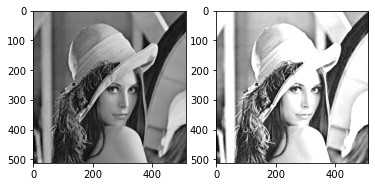

In [23]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.add(src, 100)

plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

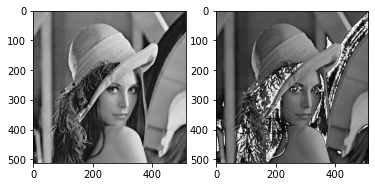

In [24]:
def saturated(value):
    if value > 255:
        value = 255
    elif value < 0:
        value = 0

    return value


dst = np.empty(src.shape, dtype=src.dtype)
for y in range(src.shape[0]):
    for x in range(src.shape[1]):
        dst[y, x] = src[y, x] -50
        #dst[y, x] = saturated(src[y, x] - 50 )     
        
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)        

# 2. 효과적인 명암비  조절

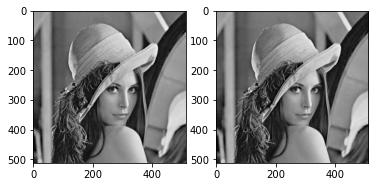

In [25]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

# dst(x,y) = src(x,y) + (src(x,y) - 128)*alpha  
alpha = -0.1
dst = np.clip(src + (src - 128.)*alpha, 0, 255).astype(np.uint8)

plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)  

# 3. 감마보정

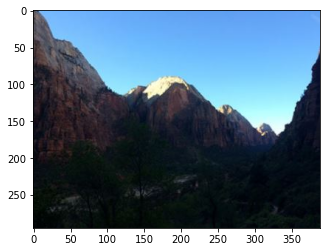

In [26]:
src = cv2.imread("gamma.jpg") 
imshow("", src)

In [27]:
gamma = 0.5
lut = np.zeros((256,1),dtype = 'uint8')
for i in range(256):  lut[i][0] = 255 * (float(i)/255) ** (gamma)
dst = cv2.LUT(src, lut)


gamma = 1.5
lut = np.zeros((256,1),dtype = 'uint8')
for i in range(256):  lut[i][0] = 255 * (float(i)/255) ** (gamma)
       
dst2 = cv2.LUT(src, lut)

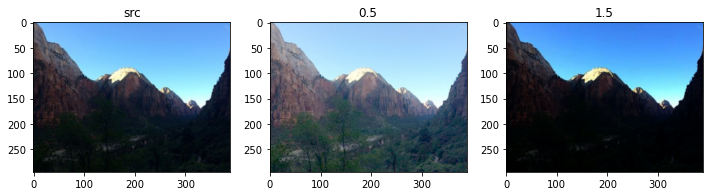

In [28]:
plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
imshow("src", src)    
plt.subplot(1,3,2)
imshow("0.5", dst)    
plt.subplot(1,3,3)
imshow("1.5", dst2)    

# 4. 히스토그램

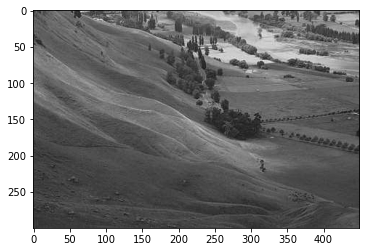

In [29]:
src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)
imshow("", src)

In [30]:
histSize = [256]
histRange = [0, 256]

hist = cv2.calcHist([src], [0], None, histSize, histRange)

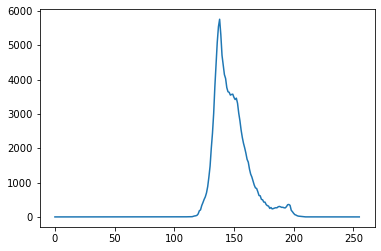

In [31]:
plt.plot(hist)

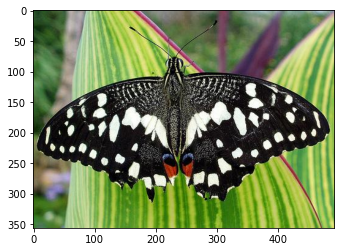

In [32]:
src = cv2.imread('butterfly.jpg')
imshow("", src)

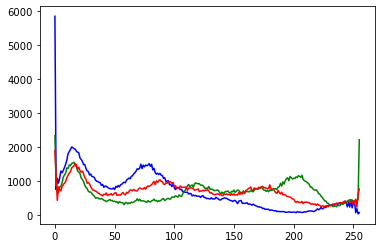

In [33]:
histB = cv2.calcHist([src], [0], None, histSize, histRange)
histG = cv2.calcHist([src], [1], None, histSize, histRange)
histR = cv2.calcHist([src], [2], None, histSize, histRange)

plt.plot(histB, 'b')
plt.plot(histG, 'g')
plt.plot(histR, 'r')

# 5. Histogram stretching

In [34]:
src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)

gmin = float(np.min(src))
gmax = float(np.max(src))

dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)

In [35]:
histSrc = cv2.calcHist([src], [0], None, histSize, histRange)
histDst = cv2.calcHist([dst], [0], None, histSize, histRange)

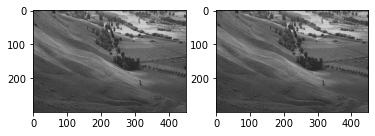

In [36]:
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

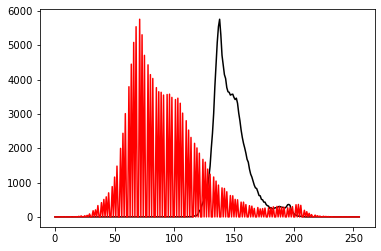

In [37]:
plt.plot(histSrc, 'k')
plt.plot(histDst, 'r')

# 6. Histogram equalization

In [38]:
src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)

histSrc = cv2.calcHist([src], [0], None, histSize, histRange)
histDst = cv2.calcHist([dst], [0], None, histSize, histRange)

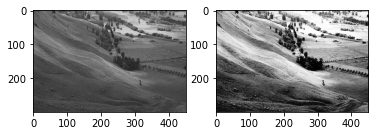

In [39]:
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

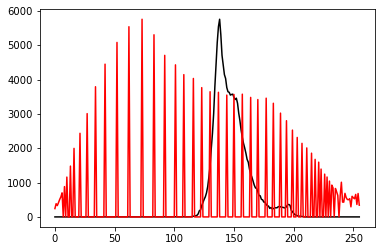

In [40]:
plt.plot(histSrc, 'k')
plt.plot(histDst, 'r')

# 4주차 과제

(<AxesSubplot:title={'center':'Hist_Cup'}>,
 Text(0.5, 1.0, 'Hist_Cup'),
 [<matplotlib.lines.Line2D at 0x1c99c777850>])

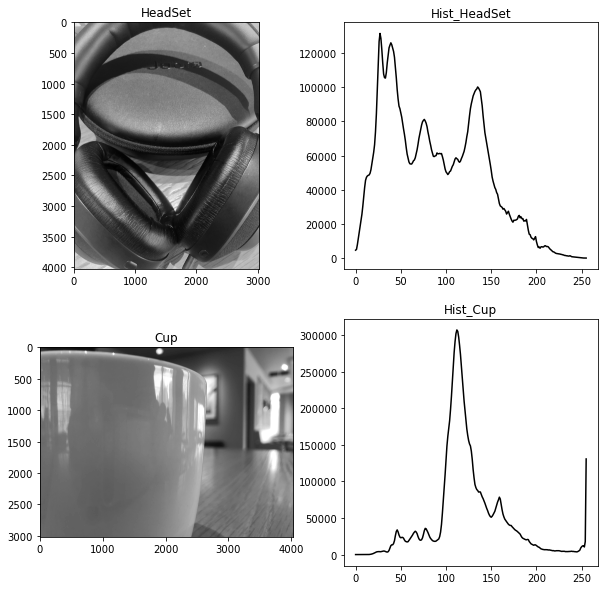

In [63]:
src1 = cv2.imread('HeadSet.jpg', cv2.IMREAD_GRAYSCALE)
#dst1 = cv2.equalizeHist(src1)
src2 = cv2.imread('Cup.jpg', cv2.IMREAD_GRAYSCALE)
#dst2 = cv2.equalizeHist(src2)

histSrc1 = cv2.calcHist([src1], [0], None, histSize, histRange)
histSrc2 = cv2.calcHist([src2], [0], None, histSize, histRange)
plt.figure(figsize=(10,10))
plt.subplot(221),imshow("HeadSet", src1)
plt.subplot(222),plt.title("Hist_HeadSet"),plt.plot(histSrc1, 'k')
plt.subplot(223),imshow("Cup", src2)
plt.subplot(224),plt.title("Hist_Cup"),plt.plot(histSrc2, 'k')

(<AxesSubplot:title={'center':'Hist_Cup'}>,
 Text(0.5, 1.0, 'Hist_Cup'),
 [<matplotlib.lines.Line2D at 0x1c99c62d3d0>])

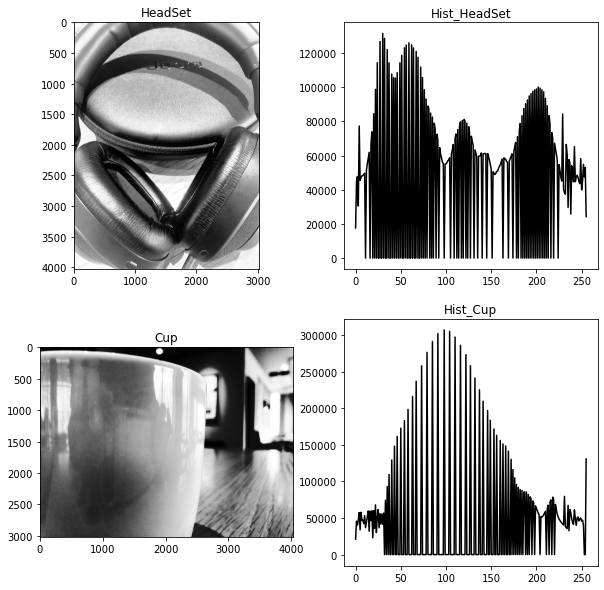

In [62]:
src1 = cv2.imread('HeadSet.jpg', cv2.IMREAD_GRAYSCALE)
dst1 = cv2.equalizeHist(src1)
src2 = cv2.imread('Cup.jpg', cv2.IMREAD_GRAYSCALE)
dst2 = cv2.equalizeHist(src2)

histSrc1 = cv2.calcHist([dst1], [0], None, histSize, histRange)
histSrc2 = cv2.calcHist([dst2], [0], None, histSize, histRange)
plt.figure(figsize=(10,10))
plt.subplot(221),imshow("HeadSet", dst1)
plt.subplot(222),plt.title("Hist_HeadSet"),plt.plot(histSrc1, 'k')
plt.subplot(223),imshow("Cup", dst2)
plt.subplot(224),plt.title("Hist_Cup"),plt.plot(histSrc2, 'k')